#Importing necessary libraries and loading sample data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from google.colab import drive

In [ ]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


# image_file = get_pkg_data_filename('/content/ch2_xsm_20211111_v1_level1.fits')
from astropy.utils.data import download_file
image_file = fits.open('/content/ch2_xsm_20190930_v1_level2.lc')




In [ ]:
img_data=image_file[1].data


##Biner()
* function approximates the flare signal depending on decision boundaries drawn from domain knowledge

In [ ]:
y=img_data['RATE']
x=img_data['TIME']




def biner(signal):
  z=[]
  for i in signal:
    if i> 100 and i<= 5011:
      z.append(1000) #type B
    elif i>5011 and i<= 25000:
      z.append(5000) #type C
    elif i>25000 and i<= 250000:
      z.append(25000) #type M
    elif i>2500000:
      z.append(250000) #type X
    elif i<=800: z.append(0) #inconclusive, could be A
  return z




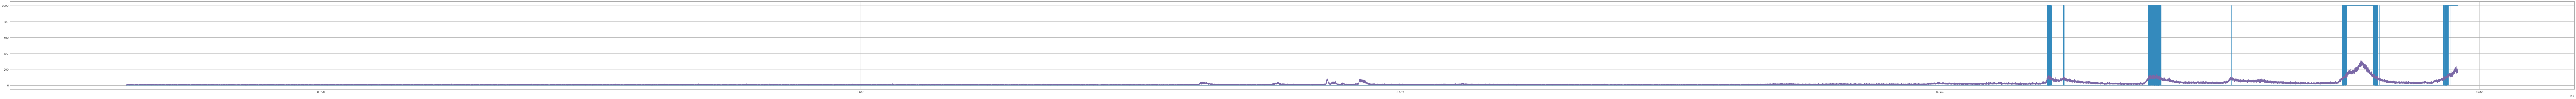

In [ ]:
z=biner(y)

plt_1 = plt.figure(figsize=(200,7))
plt.plot(x, z)
plt.plot(x, y)
plt.show()




#Stable()
* signal denoiser

In [ ]:
def stable(signal):
  timer=0
  ts=0
  for i in range(len(signal)):
    if signal[i]!=0 and timer==0:
      ts=i
      timer=1
    if signal[i]==0 and timer==1:
      timer=0
      if i-ts<40:
        for j in range(ts, i+1):
          signal[j]=0

  return signal
  

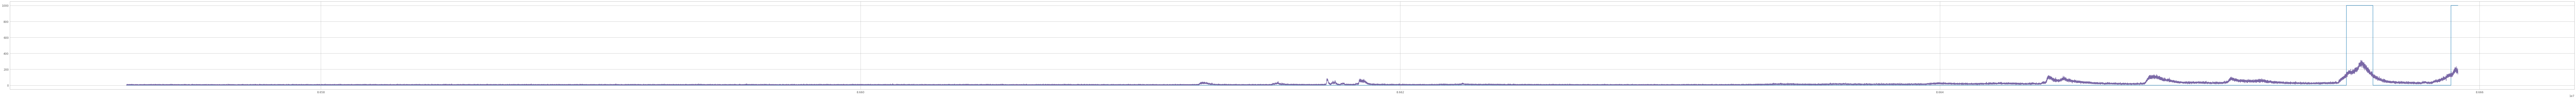

In [ ]:
f= stable(z)

plt_1 = plt.figure(figsize=(200,7))
plt.plot(x, f)
plt.plot(x,y)
plt.show()


#extractor()
* feature extractor

In [ ]:
def extractor( signal, time):
  stable_signal= stable(biner(signal))
  t_start=[]
  i_start=[]

  start_flux=[]
  end_flux=[]
  
  t_stop=[]
  i_stop=[]

  peak_count=[]
  t_peak=[]
  i_peak=[]

  i_rise=[]
  t_rise=[]

  i_decay=[]
  t_decay=[]

  cat=[]
  timer=0
  for i in range(len(signal)):
    if stable_signal[i] >99 and timer==0:
      t_start.append(time[i])
      i_start.append(i)
      timer=1

    if stable_signal[i] <99 and timer==1:
      t_stop.append(time[i])
      i_stop.append(i)
      timer=0
      if t_start==[]:
        t_start.append(0)
        i_start.append(0)


  for i in range(len(t_start)):
    peak_count_val=0
    peak_instance=0
    for index in range(i_start[i], i_stop[i]):
      if peak_count_val< signal[index]:
        peak_count_val= signal[index]
        peak_instance= index

    peak_count.append( peak_count_val )
    t_peak.append( time[peak_instance])
    i_peak.append(peak_instance)

    bin_max= max(stable_signal[i_start[i]: i_stop[i]])
    if bin_max==1000: cat.append('B')
    elif bin_max==5000: cat.append('C')
    elif bin_max==25000: cat.append('M')
    elif bin_max==250000: cat.append('X')

  # for i in range(len(t_start)):
  #   up_thresh=  signal[i_peak[i]]/20
  #   down_thresh=  signal[i_peak[i]]/2
  #   start_flux.append(up_thresh)
  #   end_flux.append(down_thresh)

  for i in range(len(t_start)):
    start_t, end_t, start_i, end_i=t_peak[i], t_peak[i], i_peak[i], i_peak[i]
    while( signal[start_i]> peak_count[i]/20 and start_i>i_start[i]):
      start_i-=1
    while( signal[end_i]> peak_count[i]/2 and end_i<i_stop[i]):
      end_i+=1
    i_rise.append(start_i)
    i_decay.append(end_i)
    t_rise.append( time[start_i] )
    t_decay.append( time[end_i] )
  
  data={
      't_start': t_start,
      't_stop': t_stop,
      'category': cat,
      'peak count rate': peak_count,
      'peak instance': t_peak,
      'rise instance': t_rise,
      'decay instance': t_decay,
      'i_start': i_start,
      'i_stop': i_stop,
      'i_peak': i_peak,
      'i_rise': i_rise,
      'i_decay': i_decay,
  }


  return data



In [ ]:
data= extractor(y, x)
t_start= data['t_start']
t_stop= data['t_stop']
t_peak= data['peak instance']
t_rise= data['rise instance']
t_decay= data['decay instance']
cat= data['category']
len(t_stop)

IndexError: ignored

Text(0, 0.5, 'count rate')

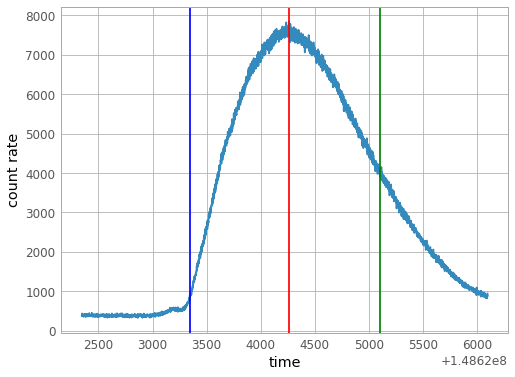

In [ ]:
i, j= data['i_start'][0], data['i_stop'][0]
rise= data['i_rise'][0]
peak= data['i_peak'][0]
decay= data['i_decay'][0]
plt.plot(x[i-1000:j], y[i-1000:j])

plt.axvline(x = x[i], color = 'b', label = 'axvline - full height')
plt.axvline(x = x[rise], color = 'r', label = 'axvline - full height')
plt.axvline(x = x[decay], color = 'green', label = 'axvline - full height')
plt.xlabel('time')
plt.ylabel('count rate')


In [ ]:
for i in data.keys():
  print(i)

t_start
t_stop
category
peak count rate
peak instance
rise instance
decay instance
i_start
i_stop
i_peak
i_rise
i_decay


In [ ]:
data['category']

['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B']

In [ ]:
data['peak time']

[array([1.49127579e+08]),
 array([1.49126474e+08]),
 array([1.49126526e+08]),
 array([1.49126495e+08]),
 array([1.49126491e+08]),
 array([1.49126568e+08]),
 array([1.49126596e+08]),
 array([1.49126631e+08]),
 array([1.4912675e+08]),
 array([1.49126522e+08])]